# Format clinical steady state warfarin data

In [7]:
import os

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

## Import data

In [2]:
directory = os.getcwd()
data_raw = pd.read_csv(
    directory + '/raw_data/clinical_steady_state_INR_data_extracted_data.csv',
    header=0, usecols=list(range(67)), nrows=5700)
data_raw

,PharmGKB Subject ID,PharmGKB Sample ID,Project Site,Gender,Race (Reported),Race (OMB),Ethnicity (Reported),Ethnicity (OMB),Age,Height (cm),...,VKORC1 genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,VKORC1 QC genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,CYP2C9 consensus,VKORC1 -1639 consensus,VKORC1 497 consensus,VKORC1 1173 consensus,VKORC1 1542 consensus,VKORC1 3730 consensus,VKORC1 2255 consensus,VKORC1 -4451 consensus
0,PA135312261,PA135312629,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,193.04,...,NaN,NaN,*1/*1,A/G,G/T,NaN,C/G,A/G,NaN,NaN
1,PA135312262,PA135312630,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,176.53,...,NaN,C/C,*1/*1,A/A,G/T,T/T,C/C,G/G,T/T,C/C
2,PA135312263,PA135312631,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,40 - 49,162.56,...,NaN,NaN,*1/*1,G/G,T/T,NaN,G/G,A/G,NaN,NaN
3,PA135312264,PA135312632,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,182.24,...,NaN,NaN,*1/*1,A/G,G/T,NaN,C/G,G/G,NaN,NaN
4,PA135312265,PA135312633,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,167.64,...,NaN,NaN,*1/*3,A/G,T/T,NaN,C/G,A/G,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,PA152407681,PA152407969,21,male,White,White,not Hispanic or Latino,not Hispanic or Latino,20 - 29,185.42,...,NaN,NaN,*1/*1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5696,PA152407682,PA152407970,21,female,White,White,not Hispanic or Latino,not Hispanic or Latino,70 - 79,160.02,...,NaN,NaN,*1/*3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5697,PA152407683,PA152407971,21,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,187.96,...,NaN,NaN,*1/*1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5698,PA152407684,PA152407972,21,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,177.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For this study we are not interested in drug-drug interactions, so let's
reduce the dataset to the relevant columns.

In [3]:
data = data_raw[[
    'PharmGKB Subject ID', 'PharmGKB Sample ID', 'Age', 'Target INR',
    'Subject Reached Stable Dose of Warfarin', 'Therapeutic Dose of Warfarin',
    'INR on Reported Therapeutic Dose of Warfarin', 'CYP2C9 consensus',
    'VKORC1 -1639 consensus']]

# Filter rows were dose of warfarin and measured INR is documented
mask = \
    data['Therapeutic Dose of Warfarin'].notna() & \
    data['INR on Reported Therapeutic Dose of Warfarin'].notna()
data = data[mask]

# Filter for following CYP2C9 variants: *1/*1, *1/*2, *1/*3 *2/*2, *2/*3, *3/*3
mask = \
    (data['CYP2C9 consensus'] == '*1/*1') | \
    (data['CYP2C9 consensus'] == '*1/*2') | \
    (data['CYP2C9 consensus'] == '*1/*3') | \
    (data['CYP2C9 consensus'] == '*2/*2') | \
    (data['CYP2C9 consensus'] == '*2/*3') | \
    (data['CYP2C9 consensus'] == '*3/*3')
data = data[mask]

# Filter for following VKORC1 -1639 variants
mask = \
    (data['VKORC1 -1639 consensus'] == 'G/G') | \
    (data['VKORC1 -1639 consensus'] == 'A/G') | \
    (data['VKORC1 -1639 consensus'] == 'A/A')
data = data[mask]

# Filter for subjects whose age has been documented
mask = data['Age'].notna()
data = data[mask]

# Simplify naming of columns
data = data.rename(columns={
    'Therapeutic Dose of Warfarin': 'Warfarin dose in mg/week',
    'INR on Reported Therapeutic Dose of Warfarin': 'INR',
    'CYP2C9 consensus': 'CYP2C9',
    'VKORC1 -1639 consensus': 'VKORC1 -1639'})

data

,PharmGKB Subject ID,PharmGKB Sample ID,Age,Target INR,Subject Reached Stable Dose of Warfarin,Warfarin dose in mg/week,INR,CYP2C9,VKORC1 -1639
0,PA135312261,PA135312629,60 - 69,2.5,1.0,49.00,2.60,*1/*1,A/G
1,PA135312262,PA135312630,50 - 59,2.5,1.0,42.00,2.15,*1/*1,A/A
2,PA135312263,PA135312631,40 - 49,2.5,1.0,53.00,1.90,*1/*1,G/G
3,PA135312264,PA135312632,60 - 69,2.5,1.0,28.00,2.40,*1/*1,A/G
4,PA135312265,PA135312633,50 - 59,2.5,1.0,42.00,1.90,*1/*3,A/G
...,...,...,...,...,...,...,...,...,...
5671,PA152407657,PA152407945,70 - 79,NaN,1.0,28.00,2.30,*1/*2,A/G
5675,PA152407661,PA152407949,50 - 59,NaN,1.0,49.98,2.90,*1/*2,G/G
5677,PA152407663,PA152407951,80 - 89,NaN,1.0,55.02,2.80,*1/*1,G/G
5679,PA152407665,PA152407953,70 - 79,NaN,1.0,42.49,2.50,*1/*1,G/G


## Visualise Dose - INR distribution

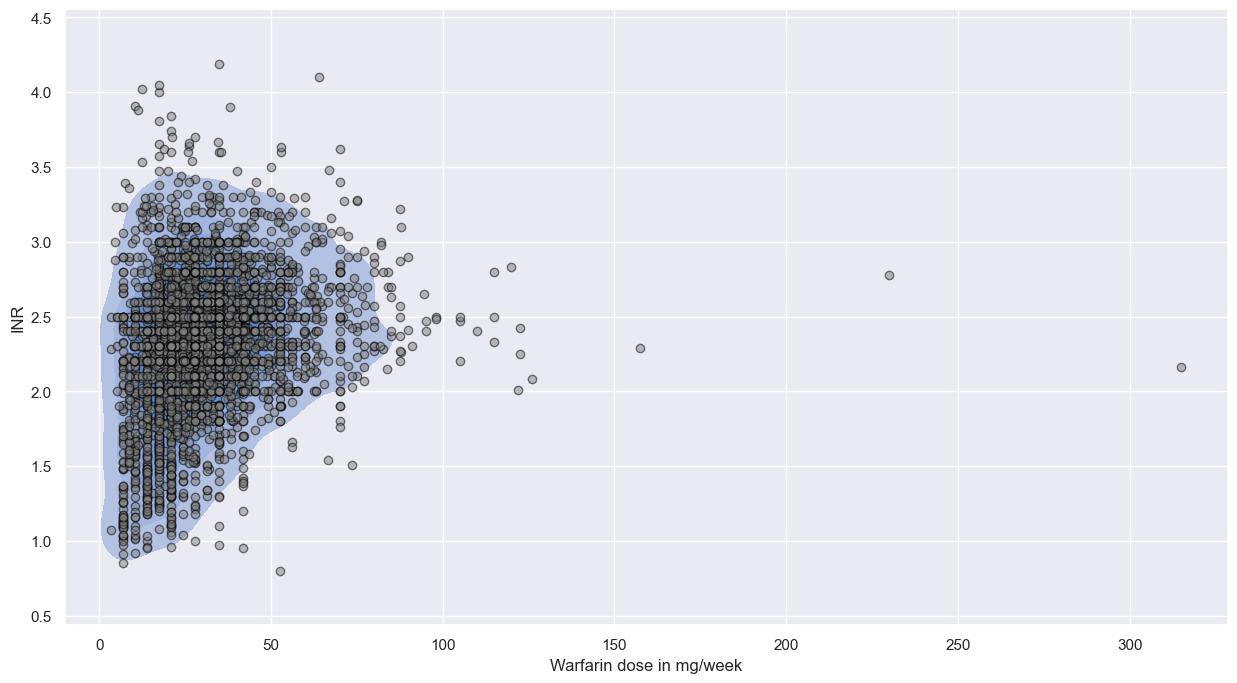

In [4]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(
    data=data, fill=True,
    x='Warfarin dose in mg/week',
    y='INR')
ax.scatter(
    data['Warfarin dose in mg/week'].values, data['INR'].values, color='grey',
    edgecolor='black', alpha=0.5)
plt.show()

## Visualise histogram over doses in therapeutic range (2-3)

In [55]:
len(doses)

2546

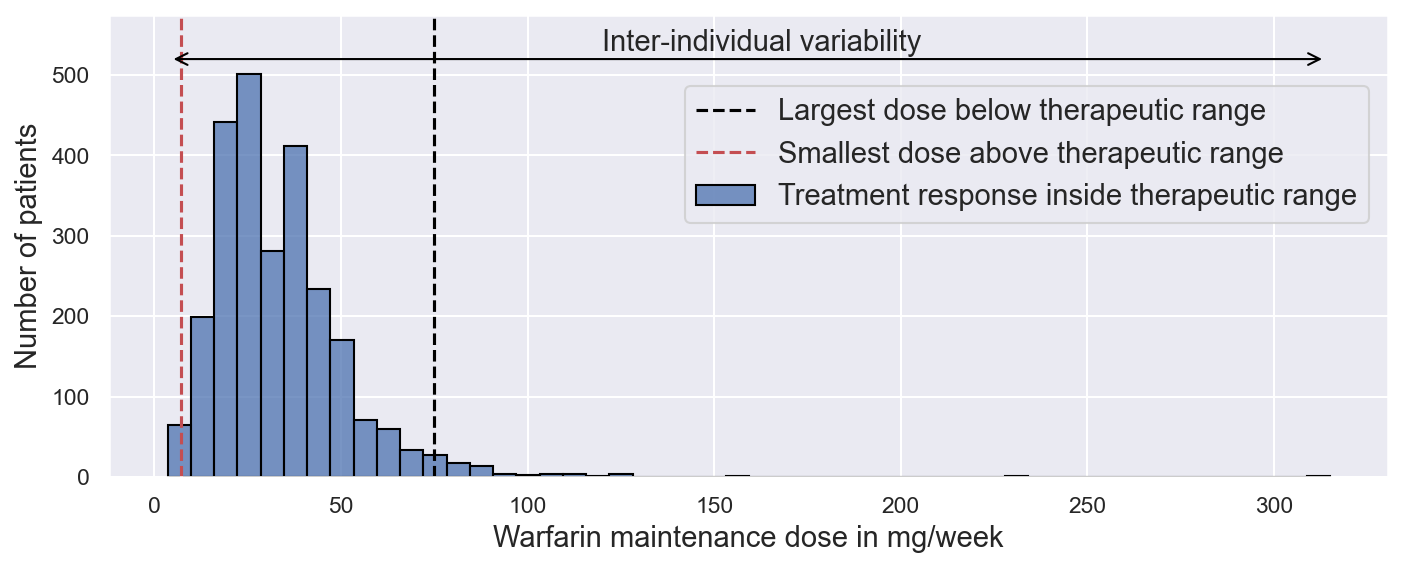

In [63]:
data_tr = data[(data.INR >= 2) & (data.INR <= 3)]
doses = data_tr['Warfarin dose in mg/week'].values

# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 800 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 1)

axes = []
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)
sns.histplot(doses, fill=True, ax=axes[0], bins=50, edgecolor='black', label='Treatment response inside therapeutic range')
axes[0].set_xlabel('Warfarin maintenance dose in mg/week', fontsize=fontsize)
axes[0].set_ylabel('Number of patients', fontsize=fontsize)
axes[0].set_ylim([0, 575])
axes[0].annotate(
    "", xy=(4, 520), xytext=(314, 520),
    arrowprops=dict(arrowstyle="<->", color='black'), fontsize=fontsize)
axes[0].text(
    s="Inter-individual variability", x=120, y=530, fontsize=fontsize)
axes[0].axvline(x=75, color='black', linestyle='--', label='Largest dose below therapeutic range')
axes[0].axvline(x=7, color=sns.color_palette()[3], linestyle='--', label='Smallest dose above therapeutic range')
axes[0].legend(loc=(0.45, 0.55), fontsize=fontsize)
plt.savefig('warfarin_clinical_trial_data_illustration.pdf', bbox_inches='tight')
plt.show()

In [73]:
np.max(doses)

315.0

In [71]:
data_otr = data[(data.INR < 2)]
doses_0 = data_otr['Warfarin dose in mg/week'].values
np.max(doses_0)

73.5

In [72]:
data_otr = data[(data.INR > 3)]
doses_0 = data_otr['Warfarin dose in mg/week'].values
np.min(doses_0)

4.9